**Q1. What is the mathematical formula for a linear SVM?**

**Answer:**

mx + c = 0


**Q2. What is the objective function of a linear SVM?**

**Answer:**

The objective function of a linear SVM (Support Vector Machine) is to maximize the margin between the decision boundary and the closest data points. The decision boundary is a hyperplane that separates the data points into two classes.

Formally, the objective function of a linear SVM can be expressed as:

minimize 1/2 * ||w||^2

subject to yi(w^T * xi + b) >= 1 for all i

where w is the weight vector, b is the bias term, xi is a data point, yi is its corresponding class label (-1 or 1), and ||w||^2 is the square of the L2 norm of w.

**Q3. What is the kernel trick in SVM?**

**Answer:**

The kernel trick is a mathematical technique used in Support Vector Machines (SVMs) to extend the algorithm to work with non-linearly separable data. The kernel trick allows SVMs to transform the original feature space of the input data into a higher-dimensional feature space, where the data becomes linearly separable.

The kernel function is a mathematical function that takes two inputs, x and y, and outputs the dot product of their corresponding transformed feature vectors.

Some commonly used kernel functions include:

**Linear kernel:** K(x, y) = x^T y

**Polynomial kernel:** K(x, y) = (x^T y + c)^d, where c is a constant and d is the degree of the polynomial.

**Radial basis function (RBF) kernel:** K(x, y) = exp(-gamma ||x - y||^2), where gamma is a constant that controls the smoothness of the decision boundary.

**Q4. What is the role of support vectors in SVM. Explain with example.**

**Answer:**

In Support Vector Machines (SVMs), support vectors are the data points that lie closest to the decision boundary or hyperplane. These data points play a crucial role in determining the location and orientation of the decision boundary and, therefore, the classification performance of the SVM.

Let's consider a two-class classification problem where we want to separate the following two classes of data points:

Class A: (-1, 0), (-2, 1), (-2, -1)
Class B: (1, 0), (2, 1), (2, -1)

The hyperplane can be defined by the equation w^T x + b = 0, where w is the weight vector and b is the bias term.

The SVM algorithm will choose the weight vector and bias term that maximize the margin between the hyperplane and the closest data points of either class. 

Support vectors: (-1, 0), (-2, 1), (1, 0), (2, 1)

The distance between the hyperplane and the closest data points is equal to the margin. The margin can be computed as 2/||w||, where ||w|| is the L2 norm of the weight vector.

By solving the optimization problem of the SVM, we can obtain the following weight vector and bias term:

w = (-2, 0)
b = 0

The decision boundary or hyperplane is given by the equation w^T x + b = 0, which in this case is equivalent to the equation -2x1 + 0x2 + 0 = 0. The decision boundary is a vertical line at x1 = 0. 

The SVM will classify any new data point to the left of this line as Class A and any data point to the right of this line as Class B.

**Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?**

**Answer:**

The concepts of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM with examples and graphs.

**Hyperplane:** A hyperplane is a decision boundary that separates the data points into two classes. In a binary classification problem, the hyperplane can be represented as a linear equation in the form of w^T x + b = 0, where w is the weight vector and b is the bias term. The hyperplane separates the positive and negative examples in the dataset. 

Here's an example:

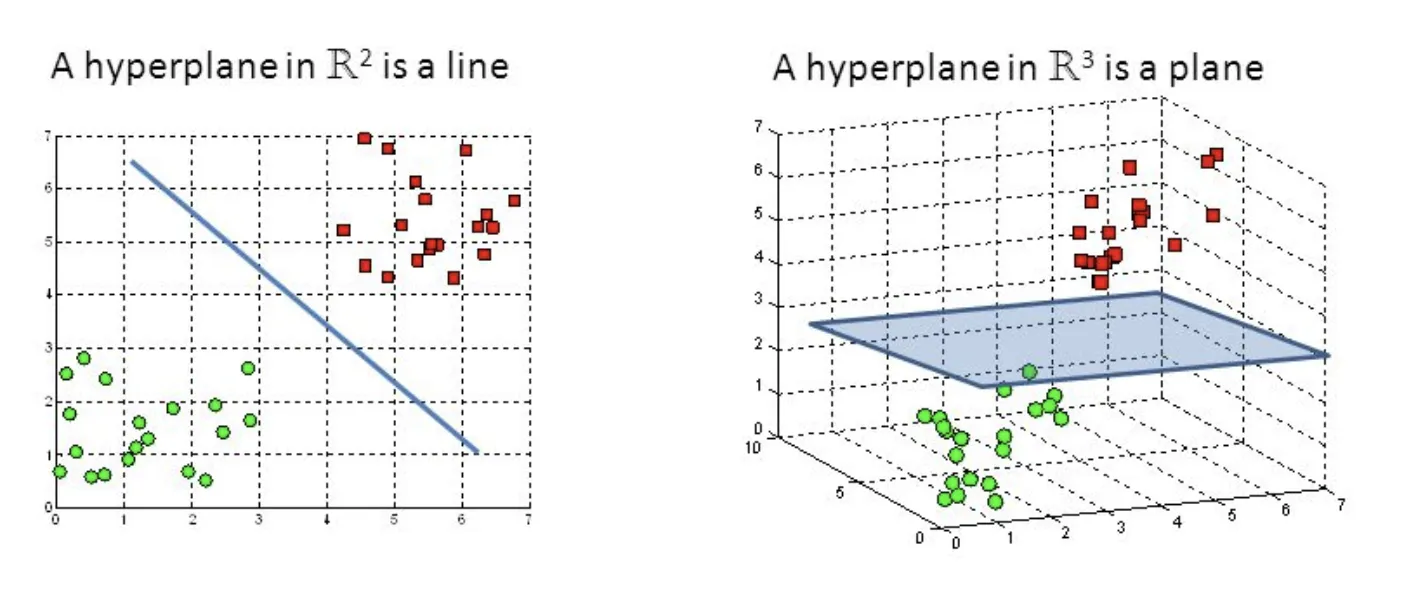


**Marginal plane:** The marginal plane is the boundary that is equidistant from the two hyperplanes in a binary classification problem. It is also known as the "maximum margin hyperplane" because it maximizes the distance between the two hyperplanes. The distance between the two hyperplanes is called the "margin". Here's an example:

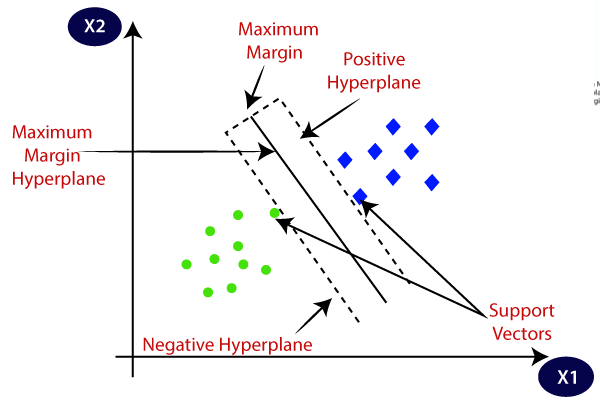

**Soft margin:** In some cases, the data may not be linearly separable, and it may not be possible to find a hyperplane that separates the two classes perfectly. In such cases, a soft margin can be used, which allows some misclassifications in the training data. The soft margin is implemented by introducing a penalty term that penalizes misclassifications. Here's an example:

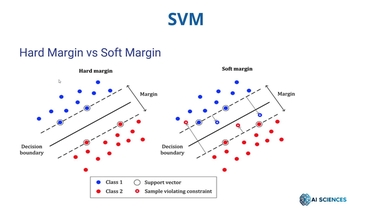


**Hard margin:** In contrast to the soft margin, a hard margin SVM does not allow any misclassifications in the training data. It assumes that the data is linearly separable and finds the hyperplane that separates the two classes perfectly. Here's an example:


**Q6. SVM Implementation through Iris dataset.**

~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing set

~ Train a linear SVM classifier on the training set and predict the labels for the testing set

~ Compute the accuracy of the model on the testing set

~ Plot the decision boundaries of the trained model using two of the features

~ Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [3]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Split the dataset into features (X) and labels (y)
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a linear SVM classifier
svm_clf = SVC(C=1, kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm_clf.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


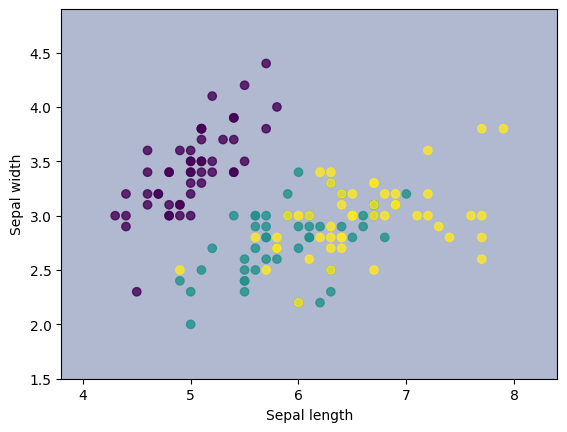

In [4]:
# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()